In [57]:
import cv2
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import os
from tqdm import tqdm
from IPython.display import Image 
import pickle
import numpy as np

In [7]:
sift = cv2.SIFT_create()


In [9]:
def getBOVW(img ,sift):
    key, desc = sift.detectAndCompute(img, None)
    return key, desc

In [68]:
path = f"roi"
bovw_list = []
for file in tqdm(os.listdir(path)):
    if file.endswith(".png"):
        file_path=os.path.join(path, file)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        key, desc = getBOVW(img, sift)
        if desc is not None:
            bovw_list.append((desc,file))
with open('BagOfVisualWords.pickle', 'wb') as pick:
    pickle.dump(bovw_list, pick, protocol=pickle.HIGHEST_PROTOCOL)

100%|█████████████████████████████████████████████████████████████████████████████| 9369/9369 [00:32<00:00, 287.67it/s]


In [2]:
with open('BagOfVisualWords.pickle', 'rb') as pick:
    bovw = pickle.load(pick)

In [3]:
desc_list = []
for word in bovw:
    desc_list.extend(word[0])
    #print(len(word[0]))

In [27]:
def build_hist(desc_list, cluster):
    histogram = np.zeros(len(cluster.cluster_centers_))
    cluster_result = cluster.predict(desc_list.astype(float))
    for i in cluster_result:
        histogram[i] += 1
    return histogram

In [ ]:
kmeans.fit(desc_list)

In [24]:
histograms = []
for word in bovw:
    if word is not None:
        hist = build_hist(word[0].astype(float),kmeans)
        histograms.append(hist)

In [29]:
KNN.fit(histograms)

NearestNeighbors(n_neighbors=10)

In [38]:
file_path=f"P001.10007.bmp_roi_0_class=1.png"
img = cv2.imread("roi/"+file_path, cv2.IMREAD_GRAYSCALE)
key , desc = getBOVW(img,sift)

In [28]:
hist = build_hist(desc,kmeans)

In [31]:
dist, result = KNN.kneighbors([hist])

In [32]:
dist

array([[ 0.        ,  6.63324958,  7.21110255,  8.60232527,  9.05538514,
         9.2736185 ,  9.2736185 ,  9.74679434, 10.04987562, 10.19803903]])

In [33]:
result

array([[   0, 4596,  504, 2340, 1331, 4004, 6529, 1524, 3259, 4305]],
      dtype=int64)

In [39]:
bovw[0][1]==file_path

True

In [ ]:


#read the image


#show image
im.show()

In [58]:
def show_neightbours(results,bovw):
    for res in results:
        for idn in res:
            print(idn)
            filename=bovw[idn][1]
            print(filename)
            pil_img = Image(filename=f'roi/{filename}')
            display(pil_img)

0
P001.10007.bmp_roi_0_class=1.png


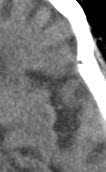

4596
P031.10007.bmp_roi_4_class=2.png


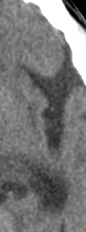

504
P004.10008.bmp_roi_0_class=1.png


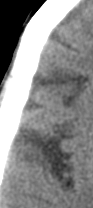

2340
P015.10014.bmp_roi_5_class=1.png


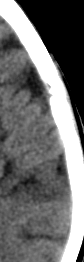

1331
P009.10010.bmp_roi_16_class=2.png


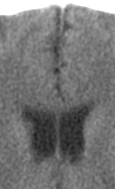

4004
P026.10009.bmp_roi_13_class=1.png


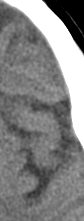

6529
P046.10007.bmp_roi_1_class=1.png


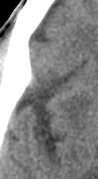

1524
P010.10012.bmp_roi_18_class=1.png


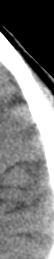

3259
P021.10021.bmp_roi_17_class=1.png


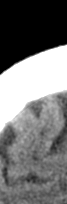

4305
P028.10015.bmp_roi_13_class=1.png


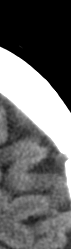

In [59]:
show_neightbours(result,bovw)